In [2]:
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)
from BI import bi

m = bi(platform='cpu')
data_path = os.path.dirname(os.path.abspath("")) + "/BI/resources/data/"

jax.local_device_count 16


# Plots interactives

## 1d hist

In [2]:
m.dist.normal(0,1, name = 'a', shape=(100,), sample = True).hist()

## 2d hist

In [3]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).hist()

## 3d hist

In [4]:
m.dist.normal(0,1, name = 'a', shape=(100,4, 5), sample = True).hist()

## Correlation matrix

In [5]:
m.dist.lkj_cholesky(4, 2, name = 'a', sample = True).corr_heatmap()

## Boxplot

In [6]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).boxplot()

## Violinplot

In [7]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).violinplot()

## Pairplot

In [8]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).pairplot()


## Time series

In [9]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).timeseries()


## Scatter3d

In [10]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).scatter3d()


## Traceplot

In [11]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).traceplot()


## Autocorr

In [12]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).autocorr()

## Surface 3d

In [13]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).surface_3d(title="3D Surface Plot of a Sinc Function")

Displaying: 3D Surface Plot of a Sinc Function


## Ridgeline

In [14]:
import jax.numpy as jnp
m.dist.normal(m.dist.categorical(probs=jnp.array([0.1, 0.8,0.1,0.]),shape=(1000,4),sample=True),5,sample=True).ridgeline(title="Ridgeline Plot of Four Categories")

## Ppc_plot

In [15]:
m.dist.normal(0,1,shape=(100,4),sample=True).ppc_plot(m.dist.normal(0,1,shape=(1,4),sample=True))

Displaying: Posterior Predictive Check


## Density

In [16]:
m.dist.normal(0,1,shape=(100,4),sample=True).density()

Displaying: Density Plot


# Non interactive plots

In [17]:
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)
from BI import bi

m = bi(platform='cpu')


jax.local_device_count 16


## 1d hist

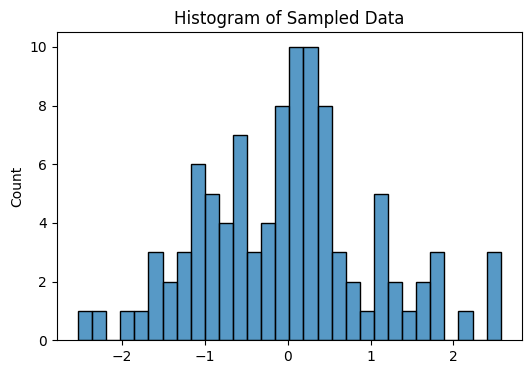

In [18]:

m.dist.normal(0,1, name = 'a', shape=(100,), sample = True).hist(interactive=False)


## 2d hist

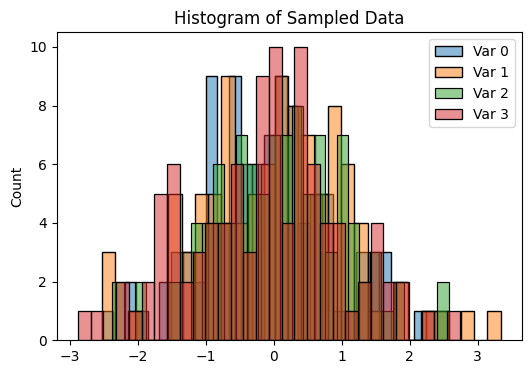

In [19]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).hist(interactive=False)

## 3d hist

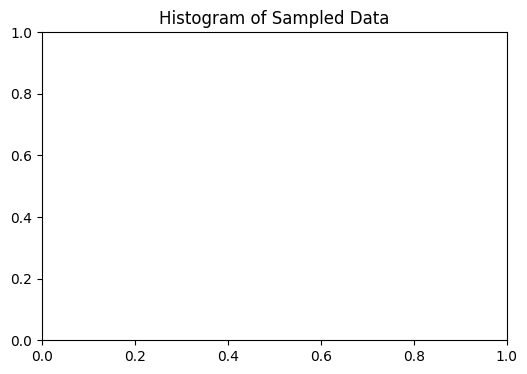

In [20]:
m.dist.normal(0,1, name = 'a', shape=(100,4, 5), sample = True).hist(interactive = False)

## Correlation matrix

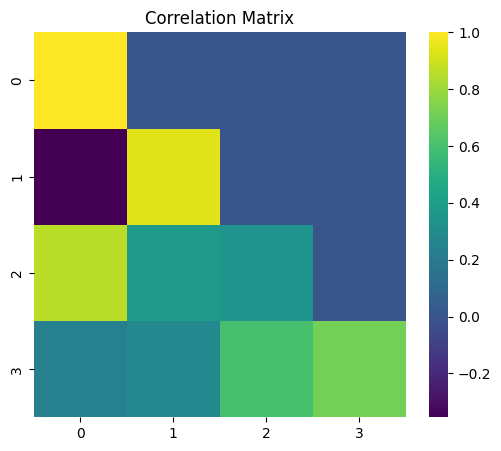

In [21]:
m.dist.lkj_cholesky(4, 2, name = 'a', sample = True).corr_heatmap(interactive = False)

## Boxplot

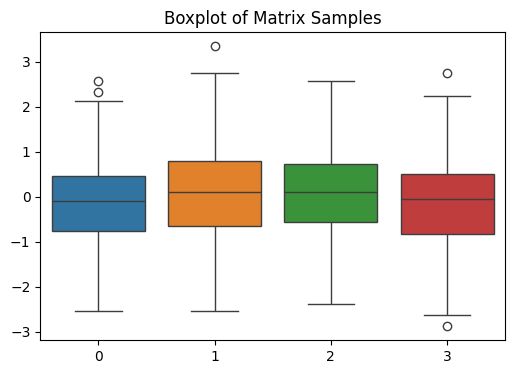

In [22]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).boxplot(interactive = False)

## Violinplot

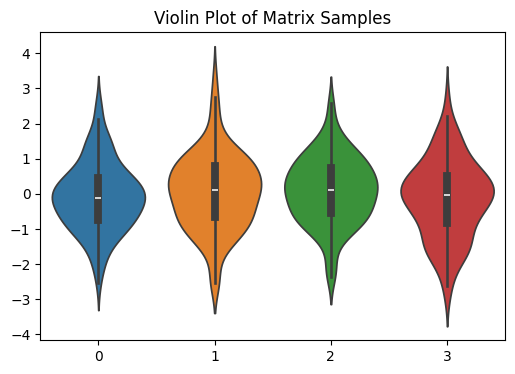

In [23]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).violinplot(interactive = False)

## Pairplot

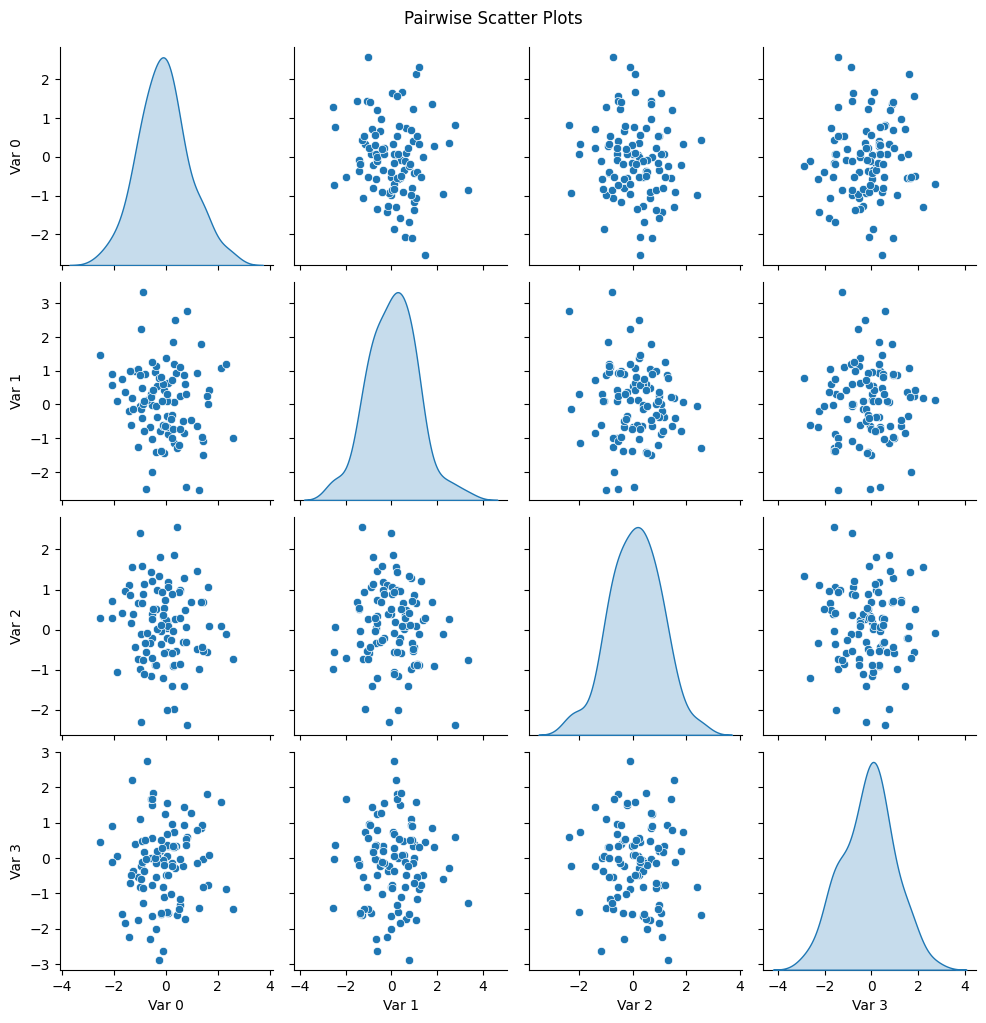

In [24]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).pairplot(interactive = False)

## Time series

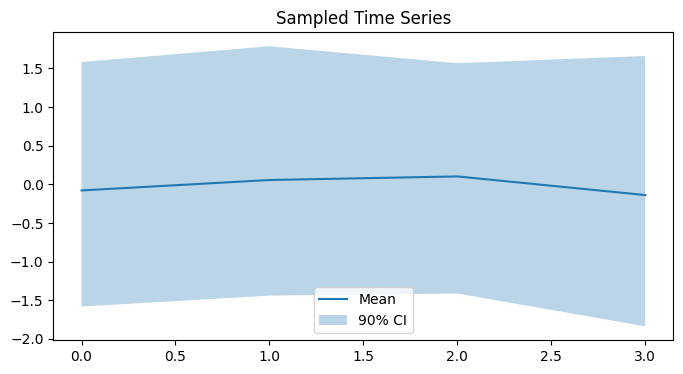

In [25]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).timeseries(interactive = False)

## Scatter3d

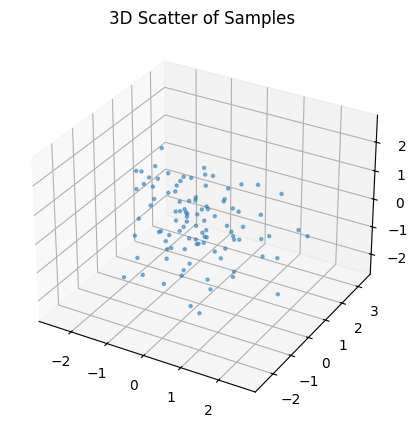

In [26]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).scatter3d(interactive = False)

## Traceplot

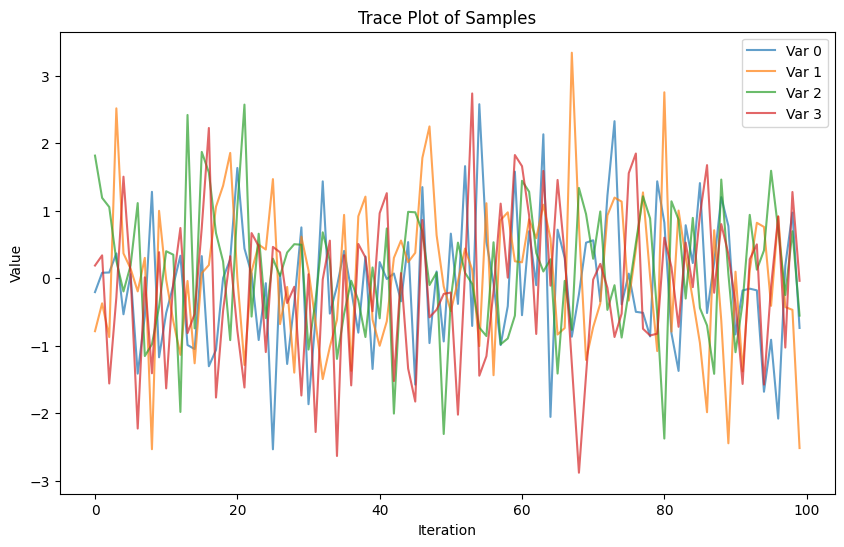

In [27]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).traceplot(interactive = False)

## Autocorr

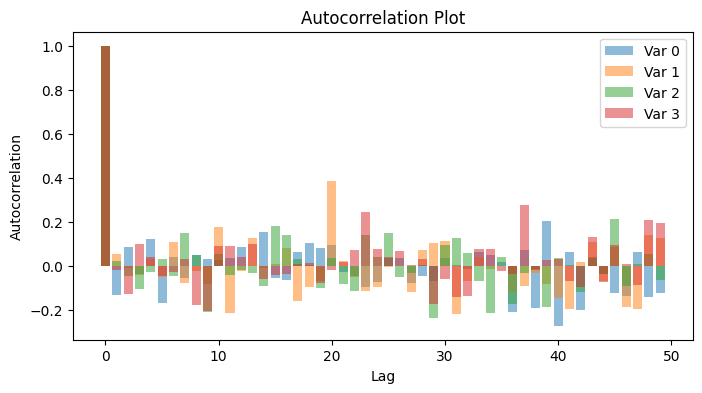

In [28]:
m.dist.normal(0,1, name = 'a', shape=(100,4), sample = True).autocorr(interactive = False)

## Ridgeline

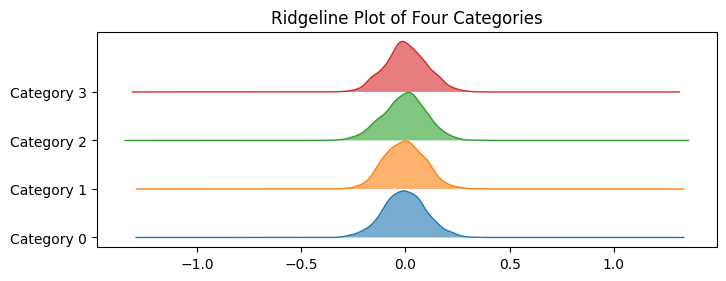

In [29]:
import jax.numpy as jnp
m.dist.normal(0,0.1, shape=(1000,4), sample=True).ridgeline(title="Ridgeline Plot of Four Categories", interactive = False, offset=4)

# From poteriors

In [1]:
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)
from BI import bi

m = bi(platform='cpu')
data_path = os.path.dirname(os.path.abspath("")) + "/BI/resources/data/"

jax.local_device_count 16


In [13]:
import time as tm
# setup platform------------------------------------------------
m = bi(platform='cpu')

# import data ------------------------------------------------
m.data(data_path + 'Howell1.csv', sep=';') 
m.df = m.df[m.df.age > 18]
m.scale(['weight'])


# define model ------------------------------------------------
def model(weight, height):    
    a = m.dist.normal( 178, 20, name = 'a')
    b = m.dist.log_normal( 0, 1, name = 'b')   
    s = m.dist.uniform( 0, 50, name = 's')
    m.dist.normal(a + b * weight , s, obs=height)

# Run sampler ------------------------------------------------
m.fit(model, num_samples=500, num_chains=4) 
m.summary()

jax.local_device_count 16


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,154.66,0.28,154.22,155.11,0.01,0.01,1912.82,1630.66,1.0
b,5.80,0.28,5.38,6.25,0.01,0.01,1779.03,1519.74,1.0
s,5.14,0.20,4.81,5.47,0.00,0.00,2005.82,1068.71,1.0


In [14]:
m.diag.density()

In [15]:
m.diag.pair()

In [16]:
m.diag.plot_trace()

In [17]:
m.diag.autocor()

In [18]:
m.diag.forest()

In [19]:
m.diag.forest()

TypeError: 'Figure' object is not callable